<a href="https://colab.research.google.com/github/Khamaldeeen/StuternCapstoneProject/blob/main/Diabetes_Early_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title: Diabetes Early Detection

## Abstract
<p> The menace of diabetes cannot be overemphasized as it is a prevalent disease among people. It is not even evident in young people and as such, numerous research has to be taken in place in order to get facts which can assist in early detection of diabetes. </p>
<p> The main goal of this project is to collect anonymous data of diabetes patients and anaylyzie some of their persisitent health conditions observed in their body system before eventually being diagnosed of diabetes. </p>
<p> The advantage of this model is that, it can easily examine some features and accurately tell if a patieent is likely to develop diabetes </p>

# Introduction
<p> Diabetes is a group of disease that affect how the body uses blood sugar (Glucose). The glucose is a vital substance in our body that makes up healthy living since it's a very important source of energy for the cells that make up the muslces and tissues. Infact, the brain is highy dependent on it for source of fuel and functionaity. </p> 
<p> There are numerous underlying causes of diabetes and it varies by types. However, each type of diabetes has one sole purpose and that is to increase the amount of sugar in the body thereby leading to excess amount of it in the blood. This can lead to serious health complicaions. </p> 
<p> Chronic diabetes conditions include type 1 and type 2 diabetes. In some cases, there are the reversible forms of diabetes which are also known as prediabetes. It occurs in cases when the sugar in the blood is high than normal but it is not classified yet as dibetes and also gestational diabetes, which occurs during preganancy but may resolve after the baby is delivered </p>

**Importing necessary libraries for EDA and Data Cleaning**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='darkgrid')

#Load data

In [3]:
data = pd.read_csv('diabetes.csv')
#Data preview
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Check for missing values.
There are several methods for checking for missing values. 
1. We can start by showing the unique values in a categorical data.
2. Use the isnull function to cumulate numbers of nan if there exists any
3. We can equally replace missing numbers with np.nan

In [4]:
for i in data.columns:
  print(data[i].unique())

[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']


In [5]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Above result indicate there are no missing values or data represented by '?' or unexpected character. 

5 Data summary

In [6]:
data.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 530 0bservations, with the average age to be placed around 48 years of age. 

# EDA

In [7]:
# This function plots the varation of features as against the severity of having diabetes
#Can give us better insights on the powerful deciding features on the the possibility of developing diabetes.
def barPlot(column):
    '''
    column takes the value of the current column feature which is used to plot against the class  of diabetes.
    '''
    fig = plt.figure(figsize = (15,6))
    sns.barplot(column, 'Class', data=data)
    plt.show()

Creating a list containing predictor variables and a seperate list which is the target variable. 
The age is not a factor here since we are more concered about the features that were recorded and if they eventually came psotive for the diabetes dignosis.
However, we can assign the age to a class of Young, Adult/Middle age and Old age. 

In [8]:
age = ['Age']
targ = ['Class', 'class']
pred_col = [x for x in data.columns if x not in age + targ]
data['Class'] = data['class'].map({'Positive':1, 'Negative':0})


In [9]:
data['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [10]:
def ageGroup(x):
  if x <= 25:
    return 'Young'
  elif x > 25 and x < 60:
    return 'Middle Age'
  else:
    return 'Old'

In [11]:
data['Age Group'] = data['Age'].apply(ageGroup)

In [12]:
data['Age Group'].value_counts()

Middle Age    422
Old            95
Young           3
Name: Age Group, dtype: int64

From the above observation, it is safe to ignore the age distrubuton and focus on other predictors.

In [13]:
pred_col1 = pred_col + ['Age Group']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


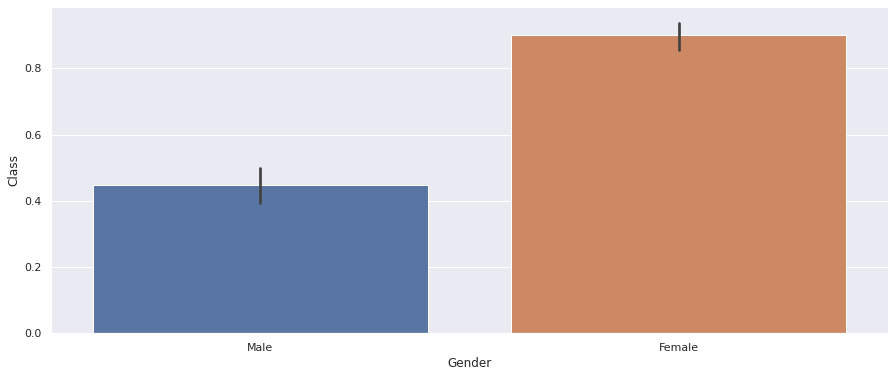

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


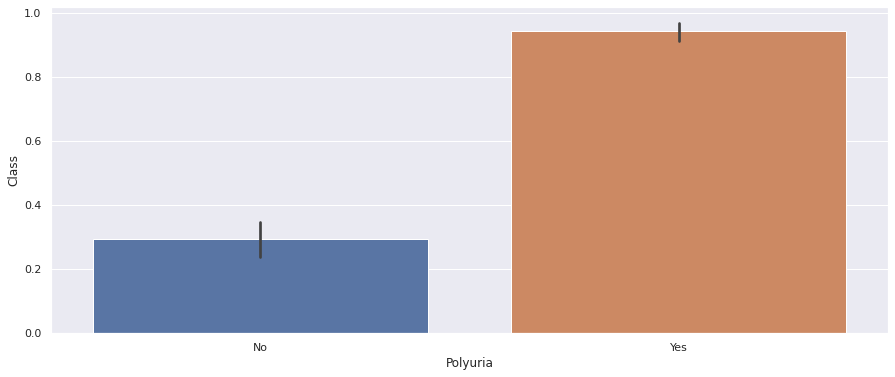

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


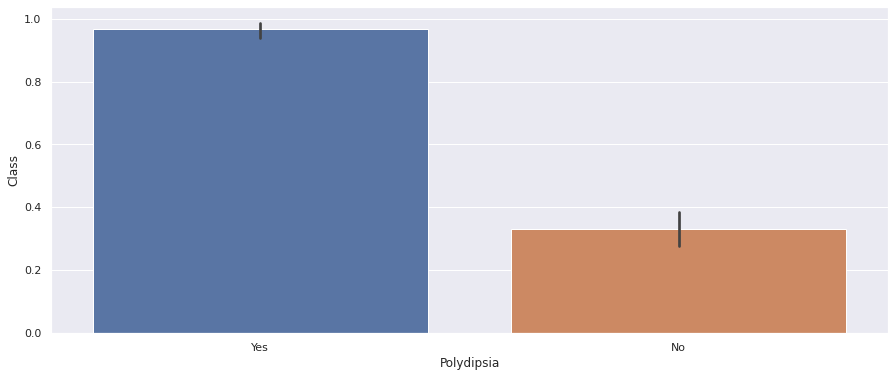

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


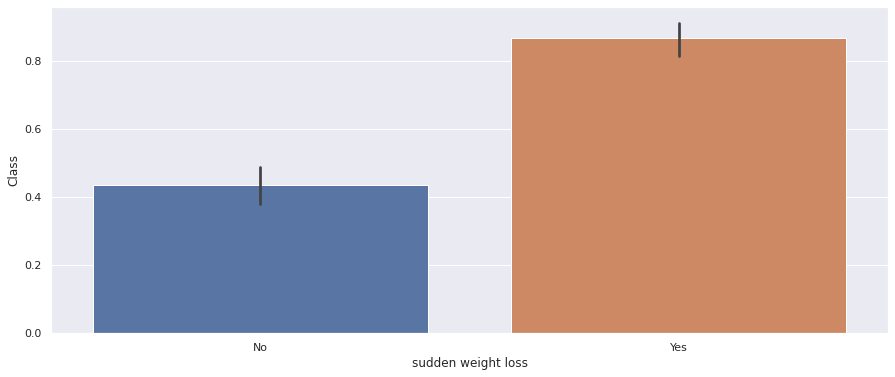

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


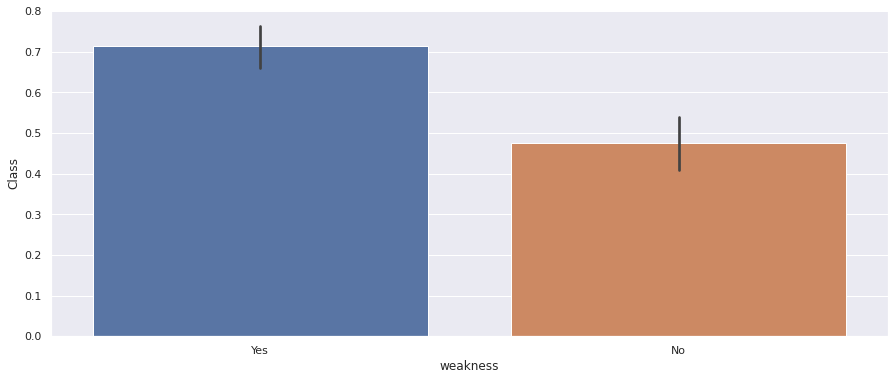

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


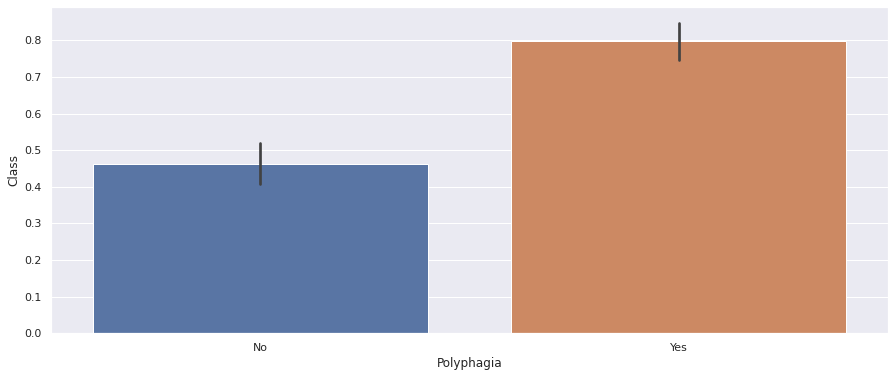

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


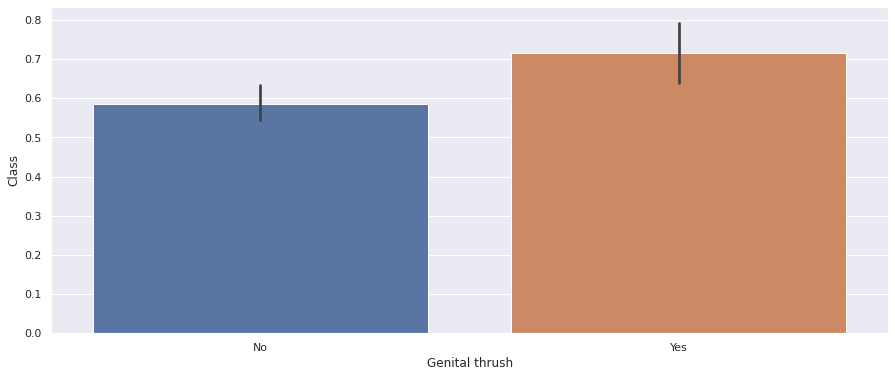

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


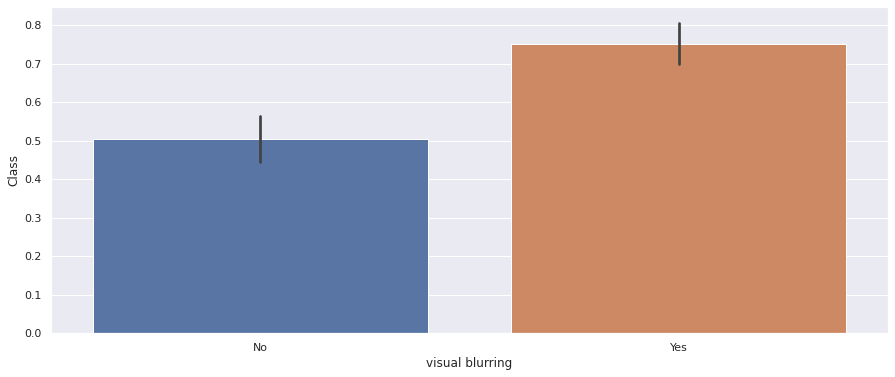

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


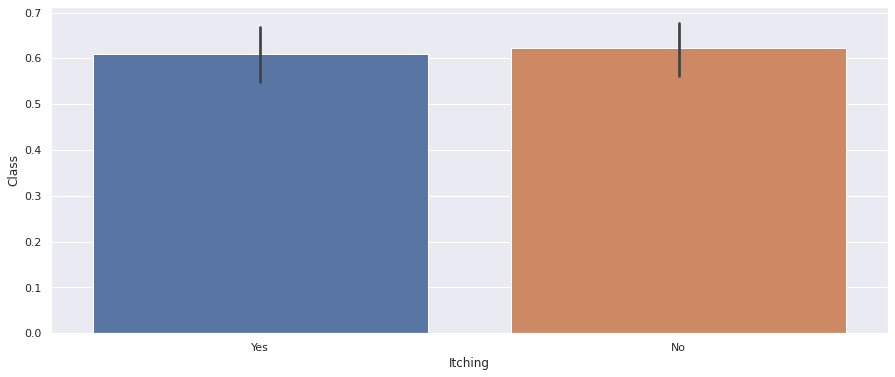

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


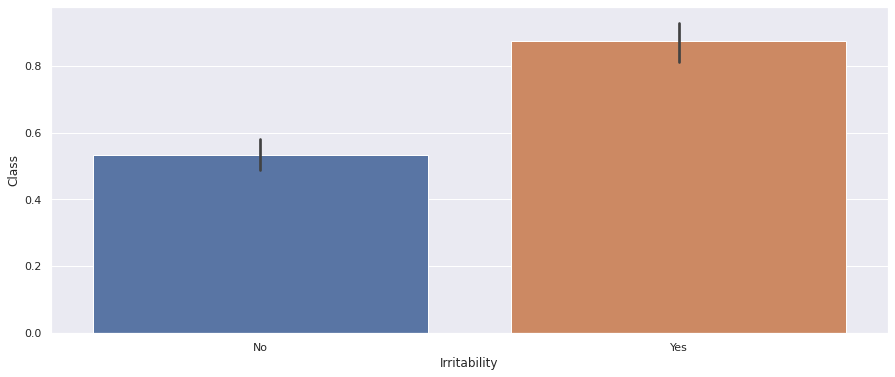

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


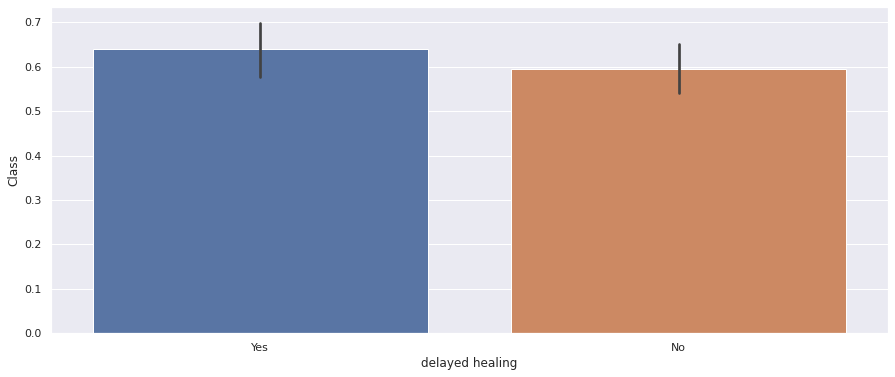

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


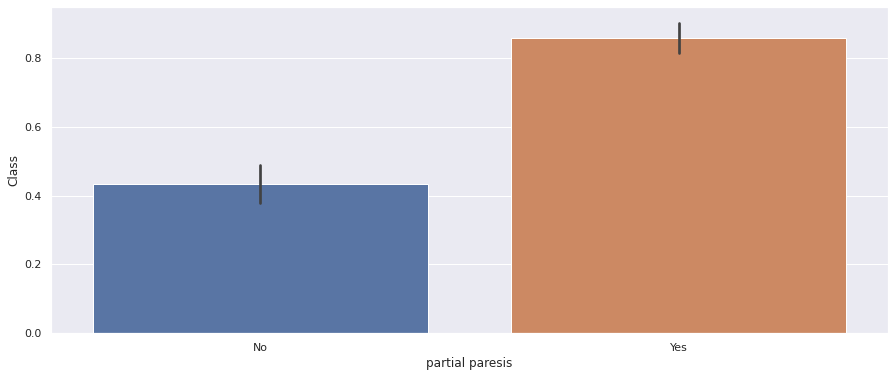

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


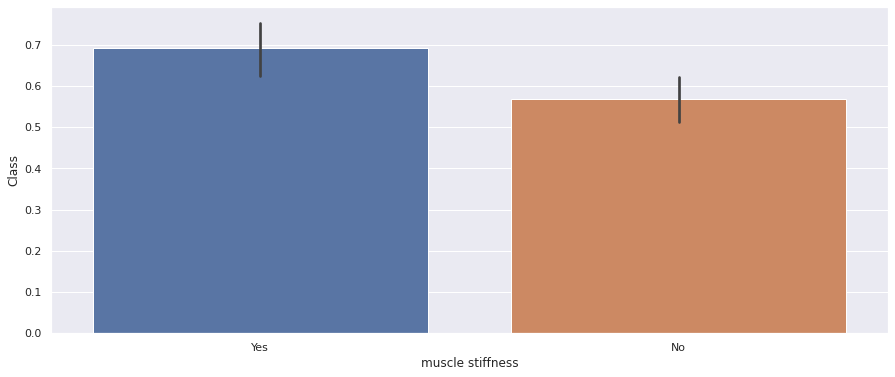

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


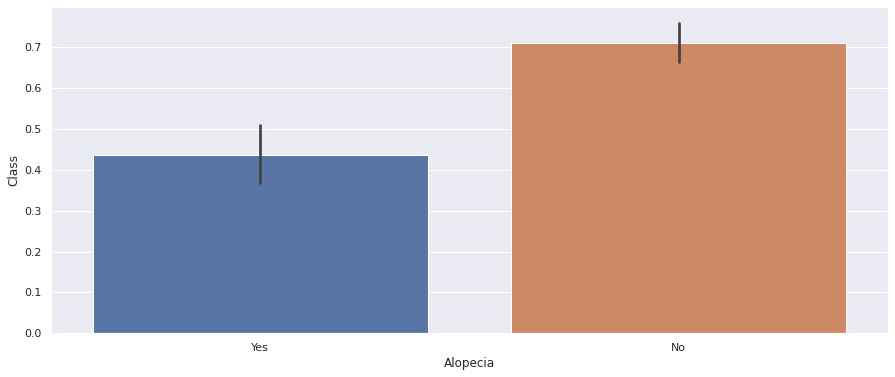

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


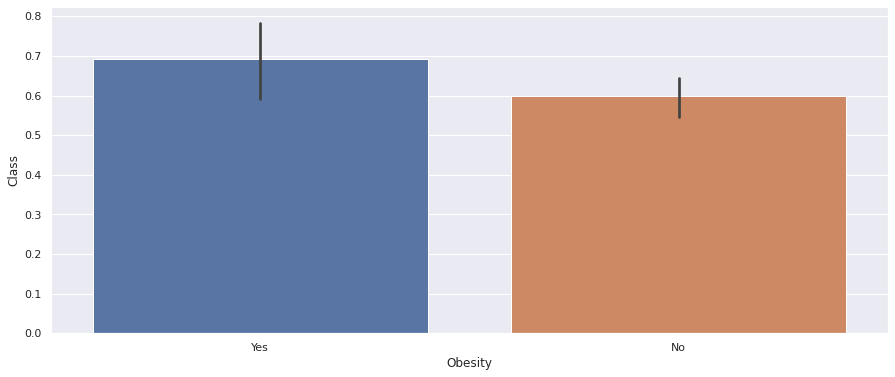

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


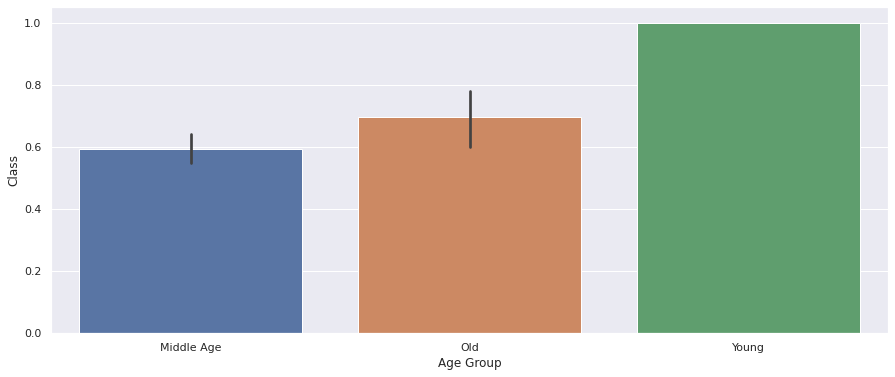

In [14]:
for i in pred_col1:
  barPlot(i)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


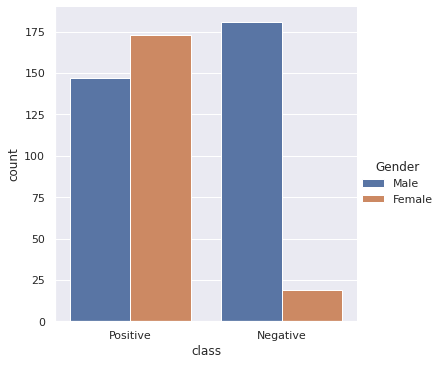

In [15]:
#Further investigation on gender
sns.catplot('class', hue='Gender', data=data, kind='count')

With 1 representing Positive and 0 repesenting Negative, the above graphs can be further explained below:
<ol>
  <li> <strong>Obesity</strong> :Obesity does not clearly indicate that the patient is at the risk of having diabetes. It is not having enough evidence to dismiss it or accept it as a factor that can lead to diabetes.
  </li>
  <li><strong>Alopecia </strong>: Having a conditon called alopecia has slighty shown that a patient is not at the risk of having diabetes. It is more aligned with having no big thing to do with diabetes. 
  </li>
  <li><strong>Muscle Stiffness</strong> : Musce stiffness might be able to tell if a patient is at the risk of having diabetes. More patient that were diagnosed with having diabetes showed symptoms of muscle stiffness in their bodies.
  </li>
  <li><strong>Partial Paralysis</strong> : This is a clear evidence that a patient suffering from this condition is at high risk of having diabetes. More than 2/3 of the patients diagnosed with this condition eventually has diabetes.  
  </li>
  <li><strong>Delayed Healing</strong> : A delayed healing is not having a clear indication to come to the conclusion that a patient might be at the risk of having diabetes. It however does not dismiss that diabetes is present in the body of the patient. 
  </li>
  <li><strong>Irritability</strong> : Irritability is a good indicator of the presence of diabetes in a patients body. Though, more conditons would have to be tested for in order to ascertain completely if the patient is at the verge of having diabetes.
  </li>
  <li><strong>Itching </strong> : Both patientd with or eithout itching showed possibility of having diabetes or not havng diabetes. This concludes that itching won't be a best fit condition to conclude that a patient may have diabetes or not. Other conditions would have to be taken into consideration
  </li>
  <li><strong>Visual Blurring </strong> : This is a good indicator as to whether a patient might be at the risk of having it. More patient with blurry sight have proven to be diabetic than those without blurry eye sight condition.
  </li>
  <li><strong>Genital Thrush</strong> : This is also a good indicator and with this condition, we can tick the boxes of underying health conditions that most likely would lead to diabetes in a patient.
  </li>
  <li><strong>Polyphagia</strong> : As seen from the graph, it is a good indicator that it highlights the presence of diabetes in a patient. 
  </li>
  <li><strong>Weakness </strong> : Frequent weakness in the body system isn't a good sign as more diabetic patient has shown to suffer from such underlying health condition. 
  </li>
  <li><strong>Obesity:</strong> Obesity doesn't clearly indicate the presence of diabetes in a patient
  </li>
  <li><strong>Sudden Weight Loss </strong> : Sudden weight loss is clearly a good sign that a patient might be at the risk of having diabetes
  </li>
  <li><strong>Polydipsia</strong> : Polydipsia is a condition whereby a patient has excessive or abnormal thirst. With the presence of this condition in a human body, it brings more clarity to the presence of diabetes in the bod
  </li>
  <li>
  <strong> Ployuria </strong> : Polyuria is excessive or an abnormally large production or passage of urine. Increased production and passage of urine may also be termed diuresis. Polyuria often appears in conjunction with polydipsia, though it is possible to have one without the other, and the latter may be a cause or an effect
  <p>The polyuria chart above further confirmed that a patient may be suffering from diabetes. It is a condition whereby a patient </p>
  </li>
  <li>
  </li>
  
  
  
  

# Model Development

<p> The problem above as indicated is a binary classification and as such will require binary classification model. 
<ul>
<li>I will be testing 3 top machine learning binary models on the dataset. 
</li>
<li>I will be comparing the accuracies, true positives and false negatives. 
</li>
</ul>
In this kind of health related problem, the true positive and true negative accuracy is highly important and as such, is needed to be highly accurate. It will be disastorus to have someone who truly has diabetes being predicted to be false (False Negative) and such person is being deprived off treatment or have someone who do not have diabetes and is being diagnosed as positive and have such person placed on diabetes drugs. </p>

The following models will be estensively tested with different amount of feature engineering performed on the dataset for each models if need be.
<ol>
<li>Random Forest </li>
<li>Logistic Regression </li>
<li>Neural Network </li>
</ol>

# Random Forest Classification

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [59]:
'''
The class below performs operations of split train test, transformation 
using either Hotencoder or Labelencoder, conversion of data into numpy array and returns the X_train, y_train, X_test and y_test
'''
class ModDiabetes:
  def __init__(self, data, transform, X_cols, y_col):
    """
    data: Takes in the object of the dataframe used for analysis
    transform:  Takes in input string of 'LabelEncoder' for label encoding transformation 
                or 'Hotencoder' for one hot encoding transformation
    X_cols: This is a list containing predictor variables headers. Helps in grabbing 
            the desired predictors from the dataframe.
    y_col:  Target variable column inputed as a string.

    """
    X = data[X_cols]
    y = data[y_col]
    X = np.array(X)
    y = np.array(y)
    #One hot encoder transformation
    if transform == 'HotEncode':
      enc = OneHotEncoder(sparse=False)
      X = enc.fit_transform(X)
    #Label encoder transformation
    elif transform == 'LabelEncoder':
      X = data[X_cols].apply(LabelEncoder().fit_transform)
      X = X.values
    self.X = X
    self.y = y

  #Function to preview the X and y arrays.
  def preLoad(self):
    return self.X, self.y

  #Function splits the array into X_train, y_train, X_test and y_test taking into consideration test size and random state
  def splitter(self, size, r_s):
    """
      r_s: Takes in an integer value specifying a random state value for the train test split
      size: Takes in a float between 0.0 and 1.0 specifying the desired size of the test. 
    """
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, random_state=r_s, test_size=size)
    return X_train, X_test, y_train, y_test

  def dataSet(self):
    '''
    Function returns an array consisting of X predictors and y target variable.
    '''
    return self.X, self.y

##Using Hot Encoder for comparison of accuracy score, f1 score and precision score

In [23]:
Model = ModDiabetes(data, 'HotEncode', pred_col, 'Class')

In [24]:
Model.preLoad()

(array([[0., 1., 1., ..., 1., 0., 1.],
        [0., 1., 1., ..., 1., 1., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 1., ..., 1., 1., 0.],
        [0., 1., 1., ..., 0., 1., 0.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 

In [25]:
trainX, testX, trainy, testy = Model.splitter(0.3, 0)

In [26]:
mod = RandomForestClassifier(random_state=0)
mod_ = mod.fit(trainX, trainy)
mod_.predict(testX)


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

In [27]:
print(classification_report(testy, mod.predict(testX)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.97      0.98      0.97        94

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



##Finding ROC AUC Score

In [28]:
print(roc_auc_score(testy, mod.predict(testX)))

0.9651681537405628


In [29]:
fpr, tpr, thresholds = roc_curve(testy, mod.predict(testX))

##Receiver of Curve Graph

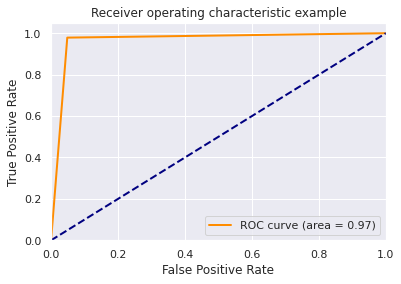

In [30]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(testy, mod.predict(testX)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##Using Label encoder for comparison of f1 score, precision and accuracy

In [31]:
Model_ = ModDiabetes(data, 'LabelEncoder', pred_col, 'Class')

##Splitting the dataset

In [32]:
trainX_, testX_, trainy_, testy_ = Model_.splitter(0.3, 0)

##Model building

In [33]:
mod_ = RandomForestClassifier(random_state=0)
mod__ = mod_.fit(trainX_, trainy_)
mod__.predict(testX_)


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1])

##Classification report

In [34]:
print(classification_report(testy_, mod_.predict(testX_)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.97      0.99      0.98        94

    accuracy                           0.97       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



In [35]:
print(roc_auc_score(testy_, mod_.predict(testX_)))

0.9704873026767331


In [39]:
fpr_, tpr_, thresholds_ = roc_curve(testy_, mod_.predict(testX_))

In [40]:
print(auc(fpr_, tpr_))

0.9704873026767331


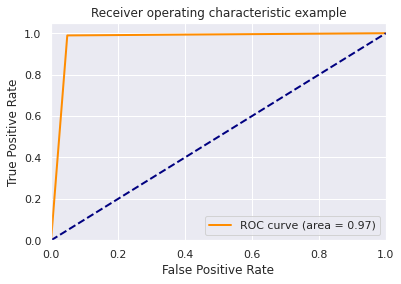

In [42]:
plt.figure()
lw = 2
plt.plot(fpr_, tpr_, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(testy_, mod_.predict(testX_)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Logistics Regression

## Generating class model for logistics classification. 

Model returns data splitted into X arrays and y arrays. 
Functions that will split into train test will be called and values of Xtest, ytest, xtrain and ytrain will be stored as a variable.

In [43]:
LogModel = ModDiabetes(data, 'LabelEncoder', pred_col, 'Class' )

In [44]:
#Splitting data into train and test set using 20% as test size
Xtrain, Xtest, ytrain, ytest = LogModel.splitter(0.2, 0)

Xtrain

In [47]:
Log = LogisticRegression()
Log.fit(Xtrain, ytrain)
Log.predict(Xtest)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

## Classification Report of Logistics Regression Model

In [48]:
print(classification_report(ytest, Log.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



## Receiver of Curve Graph and Score

In [50]:
print(roc_auc_score(ytest, Log.predict(Xtest)))

0.9468750000000001


In [51]:
#Lfpr, Ltpr and Lthresholds representing variable for logistics model class
Lfpr, Ltpr, Lthresholds = roc_curve(testy_, mod_.predict(testX_))

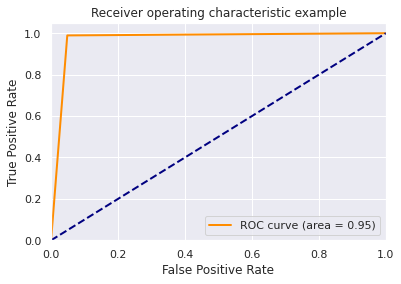

In [52]:
plt.figure()
lw = 2
plt.plot(Lfpr, Ltpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(ytest, Log.predict(Xtest)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Neural Network (Keras)

In [64]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input

## Parsing Data into Class function

Feature engineering is performed on dataset, predictor variables are specified and the target variable is equally specified

In [60]:
NN = ModDiabetes(data, 'HotEncode', pred_col, 'Class')

Grabbing the X and y array dataset.

In [61]:
X, y = NN.dataSet()

## Model development

In [55]:
model = Sequential()

In [62]:
X.shape

(520, 30)

In [67]:
#Create model, add dense layers each by specifying activation function

model.add(Input(shape=(30,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(38, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model using adam gradient descent(optimized)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model.fit(X, y, epochs=100, batch_size=1)

scores = model.evaluate(X, y)
print("\n%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

Epoch 1/100
520/520 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.7019
Epoch 2/100
520/520 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.9115
Epoch 3/100
520/520 [==============================] - 1s 2ms/step - loss: 0.1994 - accuracy: 0.9327
Epoch 4/100
520/520 [==============================] - 1s 2ms/step - loss: 0.1608 - accuracy: 0.9462
Epoch 5/100
520/520 [==============================] - 1s 2ms/step - loss: 0.1057 - accuracy: 0.9712
Epoch 6/100
520/520 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9635
Epoch 7/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9731
Epoch 8/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9769
Epoch 9/100
520/520 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9808
Epoch 10/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0377 - accura

In [69]:
scores

[0.011127591133117676, 0.9942307472229004]

# Conclusion 

Among the three models tested, it is evident and obvious that the most acceptable of them all is the NeuralNetwork model using Keras. 
It gave a whooping accuracy result of 99.4%. 

This result is very acceptable in the medical sector as it gave very minimal error of prediction. 

## Suggestion

1. More dataset can be gathered
2. Model can further be tweaked for a better accuracy. 
3. Model can be fully deployed into production for easy and simple use. 